Importing the libraries


In [25]:
import numpy as np
import cv2
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist

Splitting the Dataset

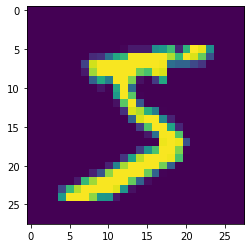

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()

In [27]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
model = Sequential()

In [29]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [32]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2005 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0825 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0458 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0395 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0341 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] 

Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


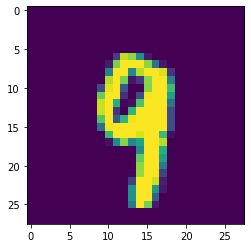

Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


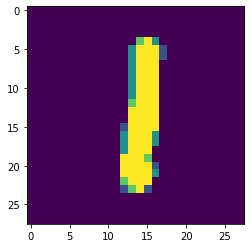

Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


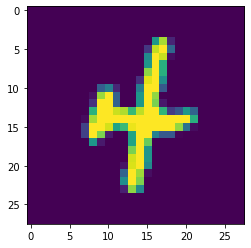

Actual digit is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], predicted 6


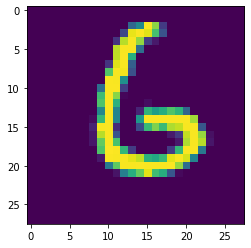

Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5


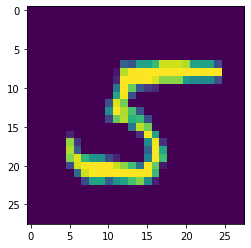

Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


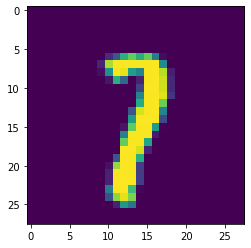

Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


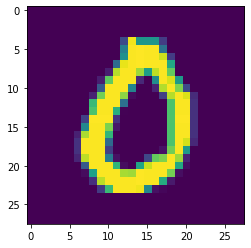

Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


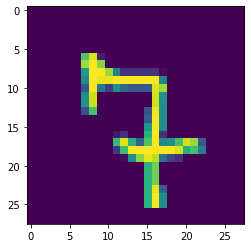

Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


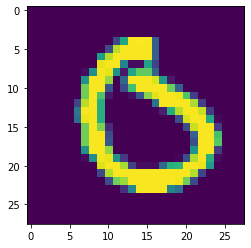

Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


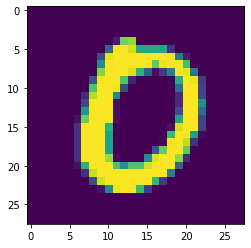

In [34]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
	print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	plt.imshow(image)
	plt.show()